# **Rodrigo_Mesquita_DR3_TP3**
## **Inteligência Artificial: Classificação [24E2_3]**

### Link Notebook: 

#### Neste TP, vamos utilizar uma base que indica o gasto anual com diversas categorias de produtos em um atacadista. A variável alvo aqui é a "channel", que contém dois valores: "1" indica compras via canal "Horeca" (Hotel/Restaurants/Cafes) e "2" indica compras via canal Retail (varejo). Veja abaixo as características da base:

1) FRESH: annual spending (m.u.) on fresh products (Continuous); 
2) MILK: annual spending (m.u.) on milk products (Continuous); 
3) GROCERY: annual spending (m.u.)on grocery products (Continuous); 
4) FROZEN: annual spending (m.u.)on frozen products (Continuous) 
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
6) DELICATESSEN: annual spending (m.u.) on delicatessen products (Continuous); 
7) CHANNEL: customer's Channel - Horeca (Hotel/Restaurant/Café) (1) or Retail channel (2) 
8) REGION: customer's Region - Lisbon (1), Oporto (2) or Other (3). (m.u.) - Monetary Units

In [2]:
%pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 8.7 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import sklearn.metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

#### Faça a importação diretamente do Github e armazene os dados em um dataframe único. Se desejar, utilize a biblioteca Pandas.

In [9]:
url = 'https://raw.githubusercontent.com/cassiusf/datasets/main/customers_data.csv'
df = pd.read_csv(url)

In [6]:
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### 1. Após carregar a base, execute as seguintes operações:<br>
#### a. Avalie a existência de dados ausentes e elimine estas observações.<br>

In [10]:
print(f"Qtd linhas DataFrame: {df.shape[0]}")
print(f"Valores nulos por coluna: ")
print(df.isnull().sum())


Qtd linhas DataFrame: 440
Valores nulos por coluna: 
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


#### b. Recodifique a variável alvo, utilizando (1) para Horeca (Hotel/Restaurant/Café) e (0) para Retail channel.<br>

In [11]:
df['Channel'] = df['Channel'].map({1: 1, 2: 0})

#### c. Separe o dataframe resultante em Treino-Teste, utilizando a proporção 70-30%.

In [14]:
X = df.drop('Channel', axis=1)
y = df['Channel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

#### d. A partir do dataframe totalmente ajustado, aplique um modelo Random Forest, utilizando as opções padrão do classificador.

In [17]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

### 2. Apresente as métricas acurácia, precision, recall e F1-score deste modelo. Apresente também a matriz de confusão resultante do processo de treinamento.

In [19]:
print("Métricas Random Forest:")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred):.2f}")

Métricas Random Forest:
Acurácia: 0.93
Precision: 0.94
Recall: 0.97
F1-score: 0.95


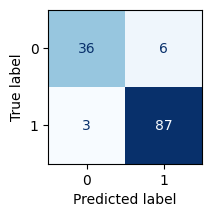

In [37]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(2, 2))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', colorbar=False, ax=ax)
plt.show()


### 3. Execute o algoritmo XGBoost na mesma base, utilizando apenas as configurações padrão do modelo. Apresente a matriz de confusão e as métricas, via "Classification Report".

In [38]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("Resultados do Modelo XGBoost:")
print(classification_report(y_test, y_pred_xgb))

Resultados do Modelo XGBoost:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        42
           1       0.95      0.98      0.96        90

    accuracy                           0.95       132
   macro avg       0.95      0.93      0.94       132
weighted avg       0.95      0.95      0.95       132



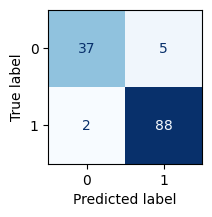

In [39]:
cm = confusion_matrix(y_test, y_pred_xgb)
fig, ax = plt.subplots(figsize=(2, 2))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', colorbar=False, ax=ax)
plt.show()

### 4. Qual modelo você utilizaria, a partir dos resultados da execução dos dois modelos? Justifique sua resposta.

> #### Utilizaria o XGBoost, pois apresentou melhores resultados em todas as métricas avaliadas para ambas as classes.